In [65]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve


In [66]:
emp_features_dataset = pd.read_csv('daily-happiness-employee-turnover/emp_features.csv')
emp_comp_features_dataset = pd.read_csv('daily-happiness-employee-turnover/emp_com_features.csv')

In [67]:
emp_features_dataset.head()

,employee,total_liked,total_disliked,total_comments,avg_comment_len,likes_received,dislikes_received,companyAlias,numVotes,stillExists,days_since_last_activity,avg_vote,likeability,dislikeability,social_index
0,0_-2,3,0,0.0,0.0,0.0,0.0,0,0,0,61,0.0,0.00,0.00,0.6
1,0_-4,4,2,22.0,54.0,116.0,46.0,0,0,0,133,0.0,0.72,0.28,7.8
2,0_-6,2,0,0.0,0.0,0.0,0.0,0,0,0,146,0.0,0.00,0.00,0.4
3,0_10,29,6,6.0,86.0,16.0,20.0,0,56,1,10,3.0,0.44,0.56,36.8
4,0_100,288,2,60.0,64.0,326.0,50.0,0,187,1,0,4.0,0.87,0.13,169.5


In [68]:
emp_features_dataset.columns

Index(['employee', 'total_liked', 'total_disliked', 'total_comments',
       'avg_comment_len', 'likes_received', 'dislikes_received',
       'companyAlias', 'numVotes', 'stillExists', 'days_since_last_activity',
       'avg_vote', 'likeability', 'dislikeability', 'social_index'],
      dtype='object')

In [69]:
emp_features_dataset['stillExists'].value_counts()

1    2941
0     608
Name: stillExists, dtype: int64

In [70]:
import matplotlib as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

<module 'matplotlib' from 'C:\\Users\\SGUPTA11\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\__init__.py'>

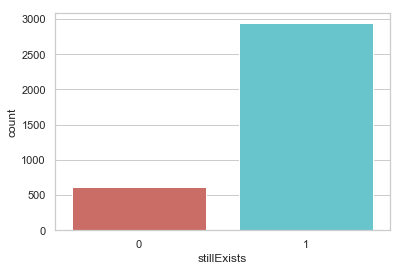

In [71]:
sns.countplot(x='stillExists', data=emp_features_dataset, palette='hls')
plt

In [72]:

y = emp_features_dataset.stillExists


In [73]:
X = emp_features_dataset.drop(['employee', 'stillExists','companyAlias', 'avg_vote'], axis=1)

In [74]:
X.head()

,total_liked,total_disliked,total_comments,avg_comment_len,likes_received,dislikes_received,numVotes,days_since_last_activity,likeability,dislikeability,social_index
0,3,0,0.0,0.0,0.0,0.0,0,61,0.00,0.00,0.6
1,4,2,22.0,54.0,116.0,46.0,0,133,0.72,0.28,7.8
2,2,0,0.0,0.0,0.0,0.0,0,146,0.00,0.00,0.4
3,29,6,6.0,86.0,16.0,20.0,56,10,0.44,0.56,36.8
4,288,2,60.0,64.0,326.0,50.0,187,0,0.87,0.13,169.5


In [75]:
normalized_df=(X-X.min())/(X.max()-X.min())

In [76]:
normalized_df.head()

,total_liked,total_disliked,total_comments,avg_comment_len,likes_received,dislikes_received,numVotes,days_since_last_activity,likeability,dislikeability,social_index
0,0.000952,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080902,0.00,0.00,0.000325
1,0.001269,0.002245,0.032934,0.061364,0.017688,0.023711,0.000000,0.176393,0.72,0.28,0.006168
2,0.000635,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.193634,0.00,0.00,0.000162
3,0.009203,0.006734,0.008982,0.097727,0.002440,0.010309,0.075676,0.013263,0.44,0.56,0.029705
4,0.091400,0.002245,0.089820,0.072727,0.049710,0.025773,0.252703,0.000000,0.87,0.13,0.137408


In [77]:
#from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(normalized_df,y,test_size=0.25,random_state=0)

In [78]:
features = list(X_train.columns)

In [79]:
RSEED = 50

# Create the model with 100 trees
rf_model = RandomForestClassifier(n_estimators=100,  random_state=RSEED,  max_features = 'sqrt', n_jobs=-1, verbose = 1)

# Fit on training data
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=50, verbose=1, warm_start=False)

In [80]:
n_nodes = []
max_depths = []

for ind_tree in rf_model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 295
Average maximum depth 18


In [81]:
train_rf_predictions = rf_model.predict(X_train)
train_rf_probs = rf_model.predict_proba(X_train)[:, 1]

rf_predictions = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [83]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(y_test, [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test, [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5

    results = {}
    
    results['recall'] = recall_score(y_test, predictions)
    results['precision'] = precision_score(y_test, predictions)
    results['roc'] = roc_auc_score(y_test, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

Recall Baseline: 1.0 Test: 0.99 Train: 1.0
Precision Baseline: 0.82 Test: 0.93 Train: 1.0
Roc Baseline: 0.5 Test: 0.95 Train: 1.0


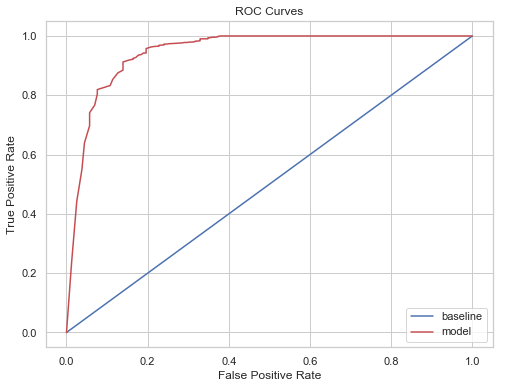

In [84]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

In [85]:
## Employee features
auc = roc_auc_score(y_test, rf_probs)
auc

0.9451144442517773

In [86]:

cnf_matrix = confusion_matrix(y_test, rf_predictions)
cnf_matrix

array([[106,  52],
       [  8, 722]], dtype=int64)

In [87]:
fi_model = pd.DataFrame({'feature': features,
                   'importance': rf_model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi_model.head(10)

,feature,importance
6,numVotes,0.494238
7,days_since_last_activity,0.172441
10,social_index,0.116495
0,total_liked,0.042432
1,total_disliked,0.030539
4,likes_received,0.030295
3,avg_comment_len,0.028024
2,total_comments,0.027920
8,likeability,0.019628
5,dislikes_received,0.019456


#### Employee company features

In [88]:
emp_comp_features_dataset.head()

,employee,total_liked,total_disliked,total_comments,avg_comment_len,likes_received,dislikes_received,companyAlias,numVotes,stillExists,...,dislikeability,social_index,num_emp,com_total_comments,com_avg_comment_len,com_total_likes,com_total_dislikes,com_total_votes,com_avg_vote,relative_happiness
0,0_-2,3,0,0.0,0.0,0.0,0.0,0,0,0,...,0.00,0.6,303,10088.0,65.8,66454.0,17024.0,26384,3.0,0.00
1,0_-4,4,2,22.0,54.0,116.0,46.0,0,0,0,...,0.28,7.8,303,10088.0,65.8,66454.0,17024.0,26384,3.0,0.00
2,0_-6,2,0,0.0,0.0,0.0,0.0,0,0,0,...,0.00,0.4,303,10088.0,65.8,66454.0,17024.0,26384,3.0,0.00
3,0_10,29,6,6.0,86.0,16.0,20.0,0,56,1,...,0.56,36.8,303,10088.0,65.8,66454.0,17024.0,26384,3.0,1.00
4,0_100,288,2,60.0,64.0,326.0,50.0,0,187,1,...,0.13,169.5,303,10088.0,65.8,66454.0,17024.0,26384,3.0,1.33


In [89]:
emp_comp_features_dataset.columns

Index(['employee', 'total_liked', 'total_disliked', 'total_comments',
       'avg_comment_len', 'likes_received', 'dislikes_received',
       'companyAlias', 'numVotes', 'stillExists', 'days_since_last_activity',
       'avg_vote', 'likeability', 'dislikeability', 'social_index', 'num_emp',
       'com_total_comments', 'com_avg_comment_len', 'com_total_likes',
       'com_total_dislikes', 'com_total_votes', 'com_avg_vote',
       'relative_happiness'],
      dtype='object')

In [124]:
emp_comp_features_dataset['avg_vote'].corr(emp_comp_features_dataset['numVotes'])

0.16814155377195367

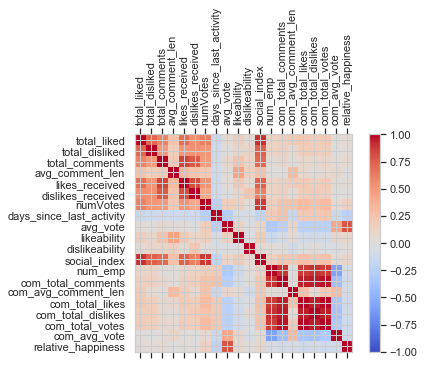

In [128]:
X1 = emp_comp_features_dataset.drop(['employee', 'stillExists','companyAlias'], axis=1)
corr = X1.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(X1.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(X1.columns)
ax.set_yticklabels(X1.columns)
plt.show()

In [90]:
y = emp_comp_features_dataset['stillExists']

In [91]:
X = emp_comp_features_dataset.drop(['employee', 'stillExists','companyAlias', 'avg_vote'], axis=1)

In [92]:
X.head()

,total_liked,total_disliked,total_comments,avg_comment_len,likes_received,dislikes_received,numVotes,days_since_last_activity,likeability,dislikeability,social_index,num_emp,com_total_comments,com_avg_comment_len,com_total_likes,com_total_dislikes,com_total_votes,com_avg_vote,relative_happiness
0,3,0,0.0,0.0,0.0,0.0,0,61,0.00,0.00,0.6,303,10088.0,65.8,66454.0,17024.0,26384,3.0,0.00
1,4,2,22.0,54.0,116.0,46.0,0,133,0.72,0.28,7.8,303,10088.0,65.8,66454.0,17024.0,26384,3.0,0.00
2,2,0,0.0,0.0,0.0,0.0,0,146,0.00,0.00,0.4,303,10088.0,65.8,66454.0,17024.0,26384,3.0,0.00
3,29,6,6.0,86.0,16.0,20.0,56,10,0.44,0.56,36.8,303,10088.0,65.8,66454.0,17024.0,26384,3.0,1.00
4,288,2,60.0,64.0,326.0,50.0,187,0,0.87,0.13,169.5,303,10088.0,65.8,66454.0,17024.0,26384,3.0,1.33


In [93]:
normalized_df = (X-X.min())/(X.max()-X.min())

In [94]:
normalized_df.head(1)

,total_liked,total_disliked,total_comments,avg_comment_len,likes_received,dislikes_received,numVotes,days_since_last_activity,likeability,dislikeability,social_index,num_emp,com_total_comments,com_avg_comment_len,com_total_likes,com_total_dislikes,com_total_votes,com_avg_vote,relative_happiness
0,0.000952,0.0,0.0,0.0,0.0,0.0,0.0,0.080902,0.0,0.0,0.000325,0.555147,0.65502,0.417783,0.541659,0.695254,0.580844,0.666667,0.0


In [95]:
#from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(normalized_df,y,test_size=0.25,random_state=0)

In [96]:
y_test.shape


(888,)

In [97]:
y_train.shape

(2661,)

In [98]:
normalized_df.shape

(3549, 19)

In [99]:
features = list(X_train.columns)

In [100]:
RSEED = 50

# Create the model with 100 trees
rf_model = RandomForestClassifier(n_estimators=100,  random_state=RSEED,  max_features = 'sqrt', n_jobs=-1, verbose = 1)

# Fit on training data
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=50, verbose=1, warm_start=False)

In [101]:
n_nodes = []
max_depths = []

for ind_tree in rf_model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 263
Average maximum depth 16


In [102]:
train_rf_predictions = rf_model.predict(X_train)
train_rf_probs = rf_model.predict_proba(X_train)[:, 1]

rf_predictions = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


Recall Baseline: 1.0 Test: 0.98 Train: 1.0
Precision Baseline: 0.82 Test: 0.95 Train: 1.0
Roc Baseline: 0.5 Test: 0.97 Train: 1.0


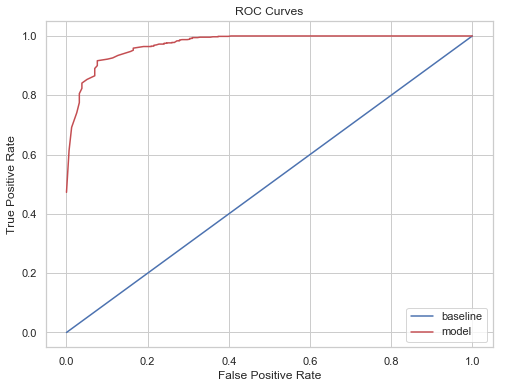

In [103]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

In [104]:
## Employee-Company features
auc = roc_auc_score(y_test, rf_probs)
auc

0.9732139760707473

In [105]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

In [106]:

cnf_matrix = confusion_matrix(y_test, rf_predictions)
cnf_matrix

array([[117,  41],
       [ 16, 714]], dtype=int64)

In [107]:
y_test.value_counts()

1    730
0    158
Name: stillExists, dtype: int64

Confusion matrix, without normalization
[[117  41]
 [ 16 714]]


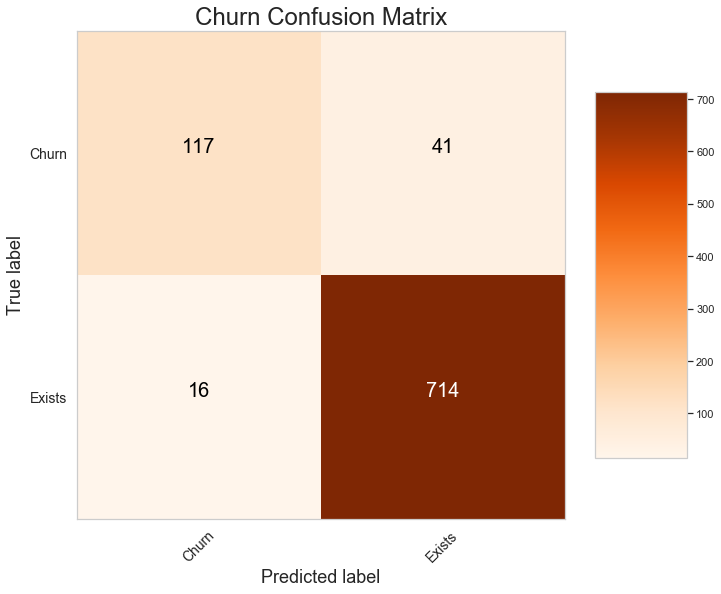

In [108]:
plot_confusion_matrix(cnf_matrix, classes = ['Churn', 'Exists'],
                      title = 'Churn Confusion Matrix')

In [109]:
tn, fp, fn, tp = confusion_matrix(y_test, rf_predictions).ravel()
specificity = tn / (tn+fp)
specificity

0.740506329113924

In [110]:
tp

714

In [111]:
positive_pred_value = tp / (tp + fp)
positive_pred_value

0.9456953642384106

In [112]:
negative_pred_value = tn / (tn + fn)
negative_pred_value

0.8796992481203008

In [113]:
fi_model = pd.DataFrame({'feature': features,
                   'importance': rf_model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi_model.head(10)

,feature,importance
6,numVotes,0.304156
18,relative_happiness,0.190312
7,days_since_last_activity,0.105610
10,social_index,0.049645
17,com_avg_vote,0.042186
0,total_liked,0.032186
16,com_total_votes,0.030868
12,com_total_comments,0.030225
11,num_emp,0.029600
4,likes_received,0.022682


In [114]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = RSEED)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 3, 
                        n_iter = 10, verbose = 1, random_state=RSEED)

# Fit 
rs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   14.0s finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=50, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': array([ 10,  13,  17,  21,  25,  29,  33,  37,  41,  44,  48,  52,  56,
        60,  64,  68,  72,  75,  79,  83,  87,  91,  95,  99, 103, 106,
       110, 114, 118, 122, 126, 130, 134, 137, 141, 145, 149, 153, 157,
       161, 165, 168, 172, 176, 180, 184, 188, ...9, 49, 49, 49, 49, 49, 49, 49, 49, 50], 'min_samples_split': [2, 5, 10], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=50, 

In [115]:
rs.best_params_

{'n_estimators': 188,
 'min_samples_split': 2,
 'max_leaf_nodes': 33,
 'max_features': 0.7999999999999999,
 'max_depth': 12,
 'bootstrap': True}

In [116]:
best_model = rs.best_estimator_

In [117]:
best_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features=0.7999999999999999,
            max_leaf_nodes=33, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=188, n_jobs=1, oob_score=False, random_state=50,
            verbose=0, warm_start=False)

In [118]:
train_rf_predictions = best_model.predict(X_train)
train_rf_probs = best_model.predict_proba(X_train)[:, 1]

rf_predictions = best_model.predict(X_test)
rf_probs = best_model.predict_proba(X_test)[:, 1]

In [119]:
n_nodes = []
max_depths = []

for ind_tree in best_model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 65
Average maximum depth 10


Recall Baseline: 1.0 Test: 0.98 Train: 1.0
Precision Baseline: 0.82 Test: 0.95 Train: 0.97
Roc Baseline: 0.5 Test: 0.97 Train: 1.0


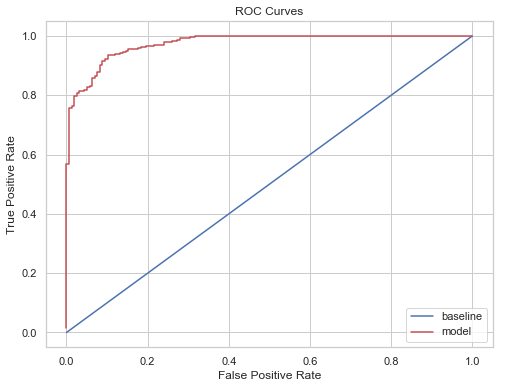

In [120]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

In [121]:
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image

In [122]:

estimator = best_model.estimators_[1]

# Export a tree from the forest
export_graphviz(estimator, 'tree_from_optimized_forest.dot', rounded = True, 
                feature_names=X_train.columns, max_depth = 8, 
                class_names = ['poverty', 'no poverty'], filled = True)

In [123]:
call(['dot', '-Tpng', 'tree_from_optimized_forest.dot', '-o', 'tree_from_optimized_forest.png', '-Gdpi=200'])
Image('tree_from_optimized_forest.png')

FileNotFoundError: [WinError 2] The system cannot find the file specified